<a href="https://colab.research.google.com/github/santiagovalencia999-bit/Informatica-1/blob/main/Unidad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/sisaza/informatica/blob/master/Unidad7/images/Inf1_cabezotedocumentos.png?raw=1" alt="header"/>

# Unidad 7: Eficiencia computacional

### Autor: Sebastián Isaza Ramírez - Profesor UdeA
    Modificaciones menores: Aníbal Guerra.


### Tabla de contenido


[7.1 Más allá del correcto funcionamiento](#sec7.1)

[7.2 La eficiencia de los programas](#sec7.2)

[7.3 Tiempo de ejecución de un programa](#sec7.3)

[7.3.1 El peor caso](#sec7.3.1)

[7.4 Modelando la Eficiencia computacional](#sec7.4)

[7.6 Búsqueda y ordenamiento](#sec7.6)

[7.6.1 Ordenamiento por selección](#sec7.6.1)

[7.6.2 Ordenamiento por mezcla](#sec7.6.2)

<a id='sec7.1'></a>

## 7.1 Más allá del correcto funcionamiento

Cuando se está aprendiendo a programar, el reto principal es lograr desarrollar algoritmos y programas que den solución a los problemas que se plantean sin incurrir en errores, es decir, que el algoritmo realmente haga lo que se espera de él, nada más, nada menos. Dicho de otra manera, que su semántica o funcionalidad sea correcta. Si el algoritmo debe listar todos los números primos menores que 10, no puede faltar ninguno ni puede incluirse un número que no sea primo.

Garantizar que un programa no cometerá ningún error, en la mayoría de los casos, es imposible (como se discute en la Unidad 6), sin embargo, el correcto funcionamiento de un programa es quizás el objetivo principal, tanto para un programador que trabaja solo, como para una empresa grande de software.

A pesar del esfuerzo que requiere lograr que un algoritmo funcione correctamente, el desafío de la programación no termina ahí. Los programas deben ser también eficientes en el uso del tiempo, es decir, deben ser rápidos. En casos extremos pero comunes, la velocidad de un programa determinará también su correcto funcionamiento. Si el programa que calcula la inclinación que deben tener los alerones y la potencia del motor de un avión se toma más tiempo del requerido, posiblemente el avión se accidentará y obviamente se dirá que el programa no funcionó correctamente. Este tipo de sistemas se conocen como sistemas de tiempo real, ya que existen límites de tiempo para sus procesos computacionales.

En otro lugar diferente del universo de los programas, son comunes situaciones en las que la cantidad de trabajo computacional que debe hacer el programa para producir resultados es tan grande, que el tiempo requerido resulta exagerado. Este es el caso  de la bioinformática, donde con frecuencia los programas deben hacer análisis tan extensos sobre bancos de datos de ADN (muy grandes), que incluso al ejecutarse en computadores muy poderosos, los tiempos de ejecución llegan a ser de meses o incluso años. En muchos de esos casos los resultados carecen de utilidad, pues no resulta viable esperar tanto tiempo. Situaciones similares se encuentran en otros escenarios de simulación computacional, como en la meteorología, la astrofísica, las neurociencias, la economía, entre otros.



<a id='sec7.2'></a>

## 7.2 La eficiencia de los programas

La eficiencia es un concepto que habla de la cantidad de recursos que se consumen para llevar a cabo una tarea. Si hay poco dinero y el objetivo es desplazarse a la universidad, hacerlo en metro será eficiente, hacerlo en bicicleta lo será aún más y por el contrario, tomar un taxi, no logrará un manejo eficiente del dinero que se tiene. Si se habla de algoritmos o programas, uno que desarrolla un proceso en menor tiempo que otro está haciendo un uso más eficiente del recurso tiempo.

Aunque la eficiencia de los programas abarca además del tiempo, el uso de memoria, el consumo de energía, entre otros, aquí solo se analizará la eficiencia en el uso del tiempo de los algoritmos. En este curso, la eficiencia se analizará en terminos de la cantidad de iteraciones requeridas para conseguir el objetivo del programa.

El siguiente código muestra un algoritmo de búsqueda por fuerza bruta que determina si el dato `e` está contenido en la lista `L`. Si la lista tiene 1024 elementos, las búsquedas tomarán, en el peor caso, 1024 iteraciones del ciclo, esto es, cuando el dato buscado no se encuentra.

In [ ]:
def linear_search(L, e):
    found = False
    while i < len(L):
        if e == L[mid]:
            found = True
            break
    return found

El siguiente código muestra un algoritmo con el mismo propósito pero que utiliza la estrategia de búsqueda binaria, asumiendo que los datos están ordenados. Para la misma lista de 1024 elementos, la búsqueda tomará 10 iteraciones.

In [ ]:
def binary_search(L, e):
    found = False
    lo = 0
    hi = len(L) - 1
    iter = 0
    while lo <= hi:
        mid = (hi + lo) // 2
        if e > L[mid]:
            lo = mid + 1
        elif e < L[mid]:
            hi = mid - 1
        else:
            found = True
            break
        iter += 1
    return found

La comparación de estos dos algoritmos es una muestra del compromiso que normalmente existe entre la eficiencia computacional y la complejidad conceptual, es decir, entre la velocidad de ejecución y la dificultad de analizar la estrategia de solución e implementar un algoritmo. Evidentemente, el algoritmo del primer código es más fácil de entender e implementar mientras que el del segundo código es más eficiente al ejecutarse.

Aquí es importante anotar también, que no siempre el algoritmo más rápido es el que debe utilizarse; pues quizás cueste más dinero, consuma más energía o es más difícil de integrarlo al resto del programa. Las prioridades de la aplicación dictarán el criterio a utilizar para tomar una decisión.



<a id='sec7.3'></a>
## 7.3 Tiempo de ejecución de un programa

*¿Cuánto se demora un programa dado en ejecutarse?* por ejemplo, el siguiente muestra un algoritmo que calcula el factorial de un número entero positivo.

In [ ]:
def fact(n):
    ans = 1 # 1
    while n >= 1: # 2
      ans = ans * n # 2
      n = n - 1 # 2
    return ans # 1
    # f1(n) = 6n + 2
    # f2(n) = n**6

Obviamente, no se tiene suficiente información para responder la pregunta, ya que el tiempo de ejecución de esta función va a depender de:

* La velocidad del computador
* La calidad del traductor
* El valor de `n`

La velocidad del computador va a depender principalmente de qué otros programas se estén ejecutando simultáneamente y de las características del hardware (más que todo, la potencia del procesador). La calidad del traductor (intérprete o compilador) dependerá de la habilidad que éste tenga para generar código de máquina eficiente. El estudio de estos dos factores pertenece al campo de la arquitectura de computadores y de los compiladores, y por lo tanto, está fuera del alcance de este curso.

Por otro lado, la influencia que tienen los datos de entrada en el tiempo de ejecución del programa, puede analizarse independientemente de los otros dos factores, enfocándose únicamente en el algoritmo. Para lograr esto, se debe transformar la medida de tiempo de ejecución en una medida de eficiencia computacional (cantidad de trabajo computacional). En lugar de segundos, vamos entonces a utilizar la cantidad de iteraciones como métrica de eficiencia computacional, que en todo caso, va a depender de los datos de entrada.

Entonces, descartando los factores referentes a la velocidad del computador y a la calidad del traductor, se puede decir que la eficiencia computacional de la función `fact` en el anterior es directamente proporcional a `n`.

<a id='sec7.3.1'></a>
### 7.3.1 El peor caso

Si se refiere de nuevo al primer algoritmo de búsqueda propuesto en este documento, verá que su eficiencia computacional depende no sólo de la longitud de la lista `L`, si no también del lugar donde se encuentra el dato buscado. Si está al principio de la lista, el algoritmo terminará su trabajo rápidamente, si está por el medio se demorará más y si está al final o no está en absoluto, se tendrá el peor de los casos. Así las cosas, se pueden identificar las siguientes situaciones para cualquier algoritmo:

* **Mejor caso**: es cuando las características de los datos de entrada (para un tamaño fijo) favorecen más al tiempo de ejecución.
* **Caso promedio**: es el generado por las condiciones promedio de las entradas.
* **Peor caso**: es cuando las características de los datos de entrada (para un tamaño fijo) generan el peor tiempo de ejecución.

En el análisis de la eficiencia computacional es interesante considerar el peor caso, pues los resultados permiten dar garantías o cotas superiores acerca de la eficiencia computacional.




<a id='sec7.4'></a>
## 7.4 Midiendo la eficiencia computacional

Considerando la métrica que hemos definido para este curso, será necesario intervenir ligeremente los códigos estudiados, introduciendo un contador que nos permita determinar el total de iteraciones requeridas para completar su tarea.

La Figura 1 muestra de nuevo la función para calcular el factorial de un número. En este caso, se ha intervenido su implementación incorporando las instrucciones de la línea 3,8 y 9, contando así la cantidad de iteraciones realizadas. Sin embargo, cabe acotar que en esta función era fácil analizar que el algoritmo completaría su tarea al repetirse `n` veces.

In [ ]:
def fact(n):
  "Asume que n es un entero mayor que cero, Retorna el factorial de n"
  #cont = 0
  ans = 1
  while n>=1:
    ans *= n
    n -= 1
    #cont += 1
  #print(cont)
  return ans

Factorial = fact(1000)

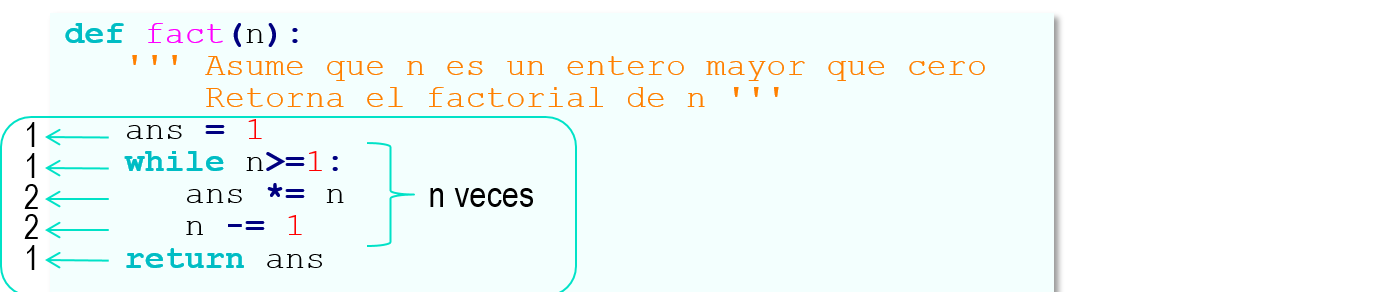


                             Fig. 1. Función para calcular el factorial de un número

Véase ahora cómo analizar un algoritmo que contiene varios ciclos. Dos escenarios son posibles.

La Figura 2 muestra que si una función se compone de varios ciclos independientes (no anidados), debe actualizarse el contador de iteraciones dentro de cada uno de ellos.

In [ ]:
def f(x):
  ans = 0
  #iter = 0
  for i in range(1000): # 2
    ans = ans + 2 # 2
    #iter = iter + 1
  for i in range(x):
    ans = ans + 2
    #iter = iter + 1
  for i in range(x): # 2
    for j in range(x): # 2
      ans = ans + 2 # 2
      ans = ans + 2 # 2
      #iter = iter + 1
  # ftc(x) = 4000 + 4x + 12x**2

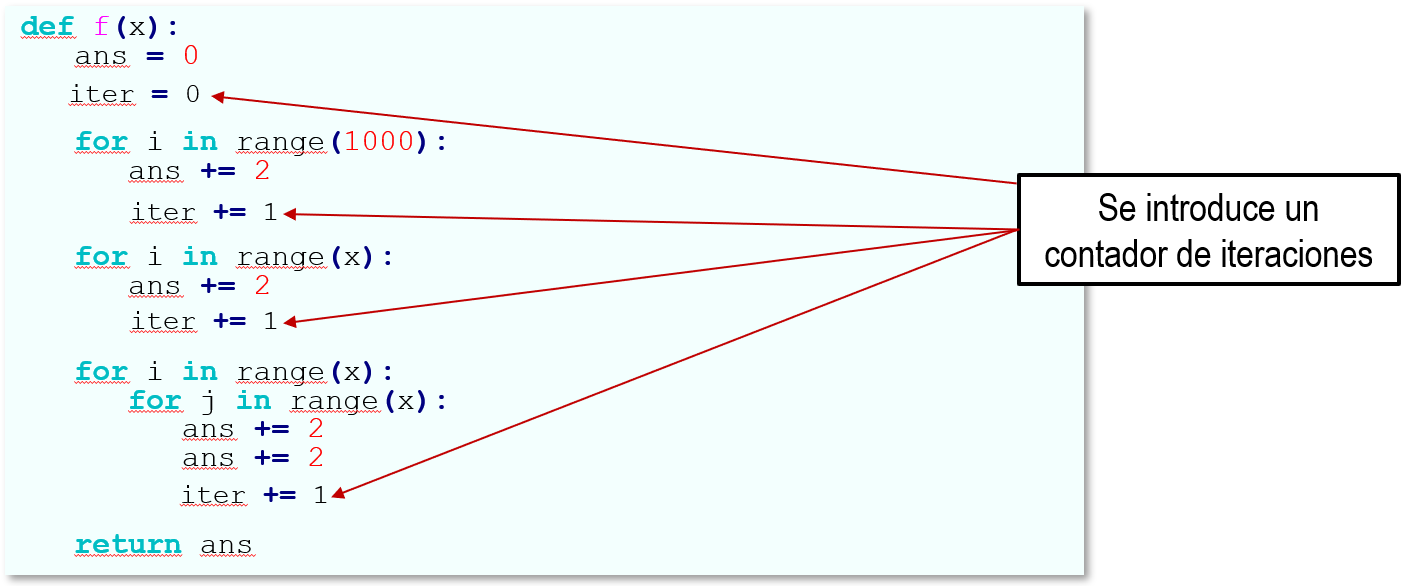

                                 Fig. 2. Función con ciclos independientes (no anidados)

En la Figura 3 se observa que si los ciclos presentan dependencia (están anidados), se debe actualizar el contador de iteraciones únicamente dentro del ciclo más interno.

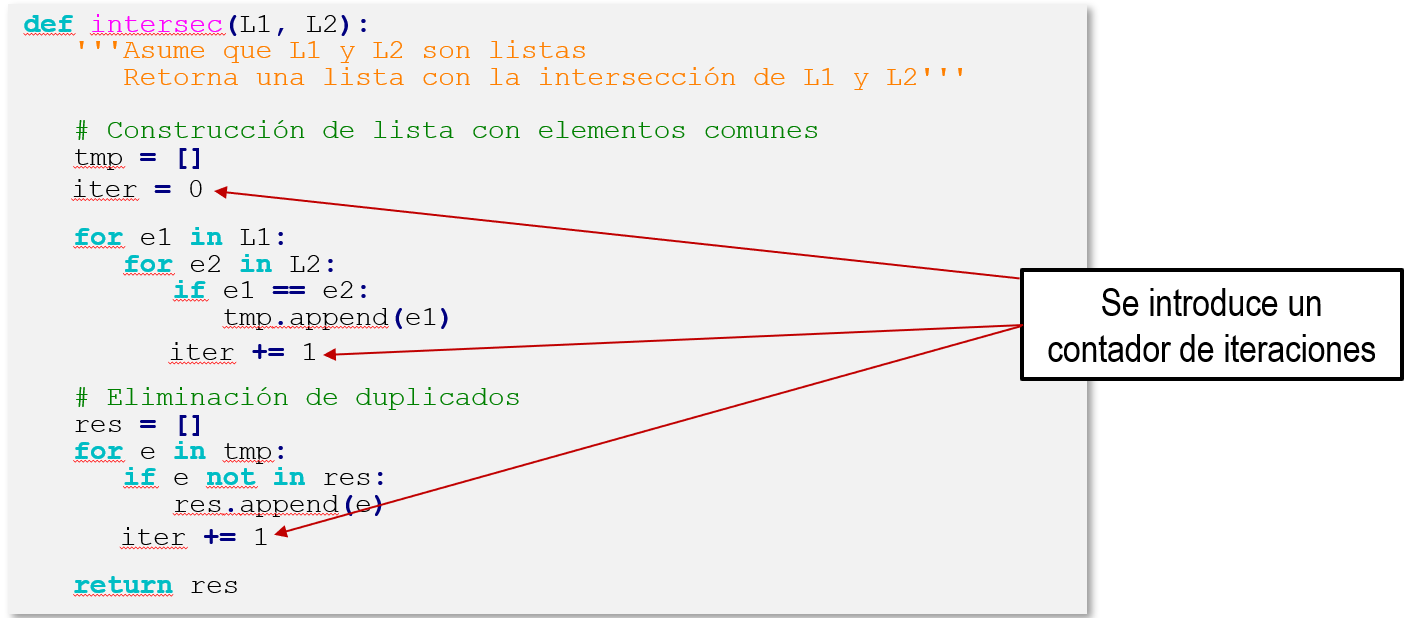


                                 Fig. 3. Función con ciclos dependientes (anidados)

Valga acotar, que en el ejemplo de la Figura 3, observamos tanto el caso de ciclos anidados, como de ciclos independientes.

<a id='sec7.6'></a>
## 7.6 Búsqueda y ordenamiento

Buscar información es uno de los problemas centrales de la informática. En la gran mayoría de programas se debe hacer algún tipo de búsqueda de datos para cumplir con otra funcionalidad de más alto nivel. Quizás el ejemplo más relevante y cercano para todos es Google.

Aunque la mayoría de ppersonas están acostumbradas, lo más impactante de esta herramienta de búsqueda web es su velocidad. Google es tan rápido e inteligente que incluso sugiere lo que se quiere buscar y muestra resultados antes de que se termine siquiera de teclear la búsqueda. Para hacerse una idea de la magnitud de esta tarea computacional, se debe terner en cuenta que hoy en día (valores de 2017), existen aproximadamente 1.195.000.000 sitios web en toda la tierra. Si se supone que cada sitio web tiene en promedio 5 páginas de contenido, que cada página tiene 500 palabras, que acceder a un sitio web se demora 50 ms y que comparar cada palabra se demora 1ns, se tendría que una búsqueda simple en Google a fuerza bruta tomaría aproximadamente 113 días. Esto es asumiendo que solo hay una persona buscando a la vez y no 38.000 por segundo como es la realidad. Evidentemente, quienes han desarrollado los algoritmos de búsqueda de Google han ido más allá de la fuerza bruta.

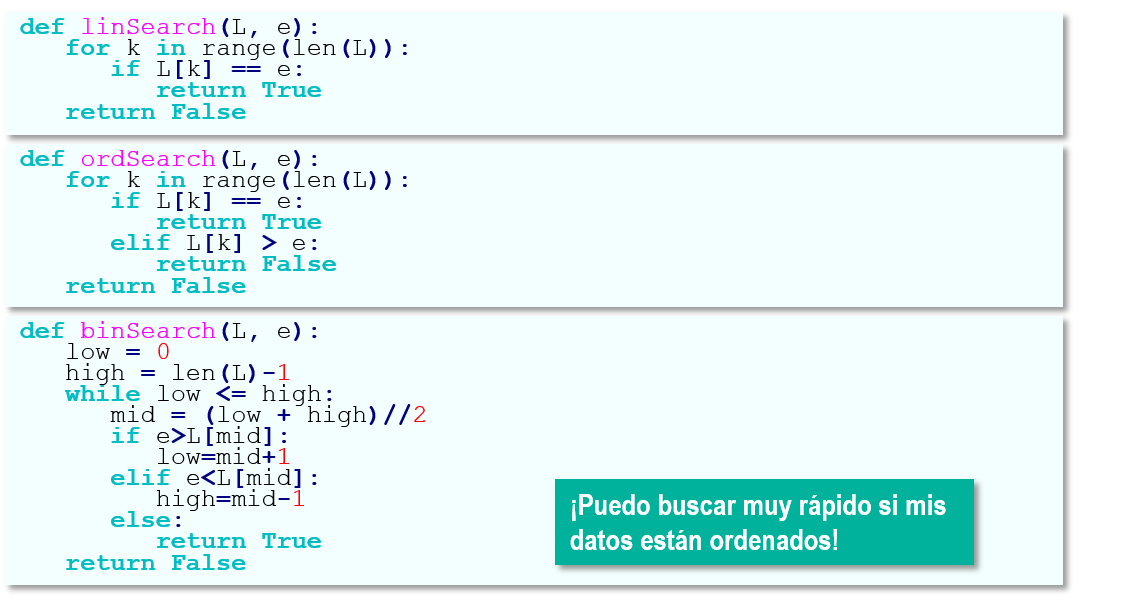

                            Fig. 4. Tres funciones que utilizan diferentes algoritmos de búsqueda

La figura 4 muestra tres funciones que utilizan diferentes algoritmos de búsqueda. La primera (`linsearch`) utiliza la estrategia más fácil y realiza un recorrido lineal según el tamaño del arreglo sobre el cual se está buscando. La segunda (`ordSearch`) implementa una pequeña optimización para cuando el arreglo de datos está ordenado. En este caso, aunque el recorrido sigue dependiendo del tamaño de la lista en el peor de los casos, en el caso promedio se vuelve hasta el doble de rápido. Finalmente la función `binSearch` utiliza el algoritmo de búsqueda binaria, que necesita los datos ordenados pero logra incrementar la eficiencia. Esto demuestra que aunque la búsqueda es un proceso computacionalmente costoso, este se puede reducir si los datos están ordenados. Ahora, ordenar datos es un proceso computacionalmente muy costoso. *¿Será entonces que vale la pena ordenar los datos antes de hacer la búsqueda?* Esa hipótesis se puede plantear para la lista `L` con la siguiente inecuación:


$$ iterBS + iterOrd < iterLS $$

Primeramente, introduzca un contador de iteraciones para la función linSearch(), llamémoslo iterLS. Luego, implementemos un contador para las iteraciones requeridas en binSearch (iterBS). Por último, definamos un contador hipotético asociado a algún algoritmo que habría de usarse para ordenar los datos (iterOrd). Entonces, para verificar si tiene sentido ordenar y aplicar la optimización propuesta en la búsqueda binaria, debemos comprobar que se cumpla dicha inecuación.


Analíticamente, podemos aplicar análisis matemático para inferir si dicha inecuación pudiera o no ser verdadera. Por ejemplo, podemos partir de la idea de que ordenar es un proceso costoso, pues para ordenar una lista de elementos es necesario, como mínimo, recorrerla toda. De acuerdo a esto, tendríamos que la cantidad de iteraciones requeridas en el mejor caso de un ordenamiento sería igual al peor de los casos de una búsqueda lineal, o sea n iteraciones.

\begin{equation}
\begin{split}
iterOrd = iterLS  & \rightarrow \text {Igual cantidad de iteraciones} \\
\end{split}
\end{equation}


Dado que, a la cantidad de iteraciones del ordenamiento hay que sumarle la cantidad de iteraciones de la búsqueda binaria, es claro que la inecuación planteada jamás se cumpliría. Por ende, ordenar los datos cada vez que necesite buscar sobre ellos es una estrategia ineficiente. Sin embargo, si se necesitan hacer muchas búsquedas sobre los datos ya ordenados (digamos *k* búsquedas), la cantidad de iteraciones requeridas para ordenarlos será cada vez menos relevante en la inecuación. En consencuencia, la diferencia entre la cantidad de las iteraciones de los métodos de búsqueda, será más importante en la medida que *k* sea más grande (o sea, que se realicen más búsquedas sobre los datos ya ordenados):

$$ k*iterBS + iterOrd < k*iterLS $$

De hecho, una de las estrategias que utiliza Google en su buscador consiste en mantener datos previamente ordenados sobre los sitios web para poder hacer búsquedas más rápidas.



<a id='sec7.6.1'></a>
### 7.6.1 Ordenamiento por selección

La Figura 5 muestra una función que implementa el algoritmo conocido como *Selection sort*. En cada iteración del ciclo externo, se hace un recorrido por la lista para buscar el elemento menor y ponerlo al principio. La Figura 5 también muestra una prueba paso a paso del algoritmo. Al tener dos ciclos anidados el algoritmo involucra una gran cantidad de iteraciones, por lo que no es conveniente utilizarlo para ordenar grandes cantidades de datos.

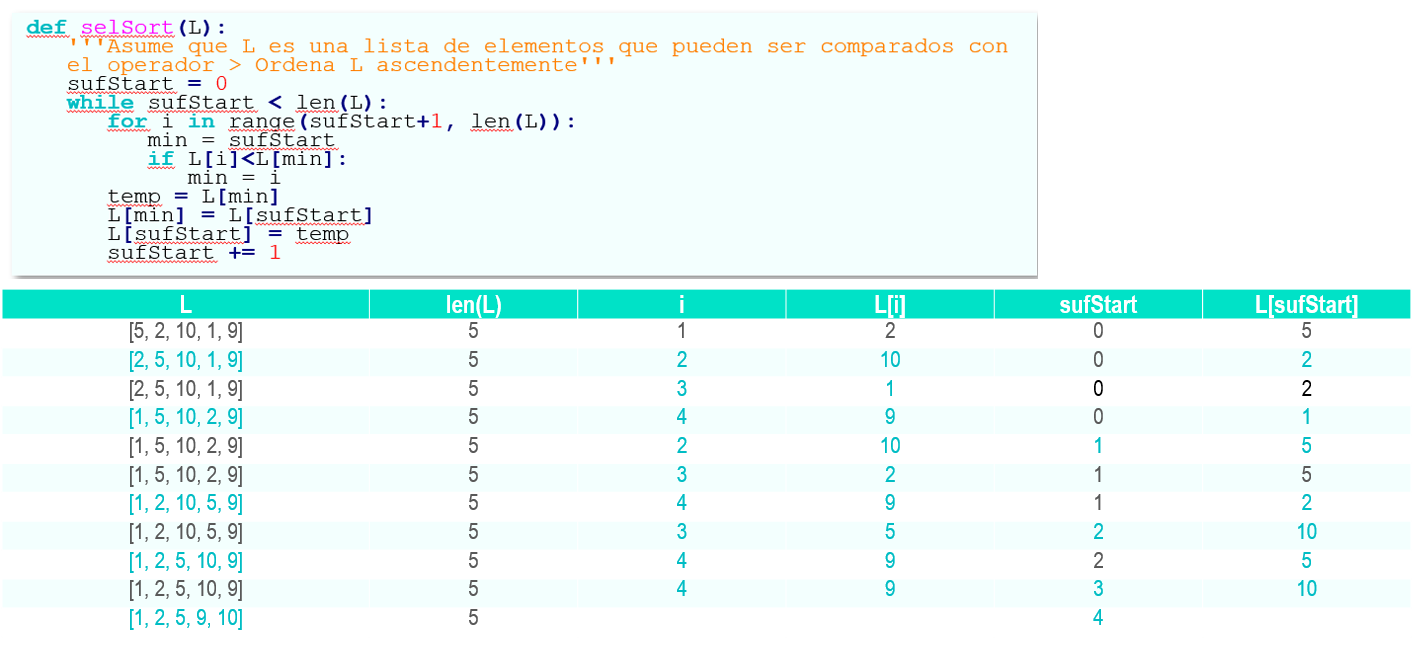


                                 Fig.5 . Implementación del algoritmo de ordenamiento por selección

<a id='sec7.6.2'></a>
### 7.6.2 Ordenamiento por mezcla

Este algoritmo, creado por John von Neumann en 1945, utiliza una idea general que está presente en muchos algoritmos eficientes: divide y vencerás. El algoritmo parte de observar que dos listas ordenadas pueden mezclarse, generando una nueva lista ordenada requiriendo *n* iteraciones. La Figura 6 muestra la función `merge` que implementa el algoritmo descrito, así una prueba paso a paso del mismo.


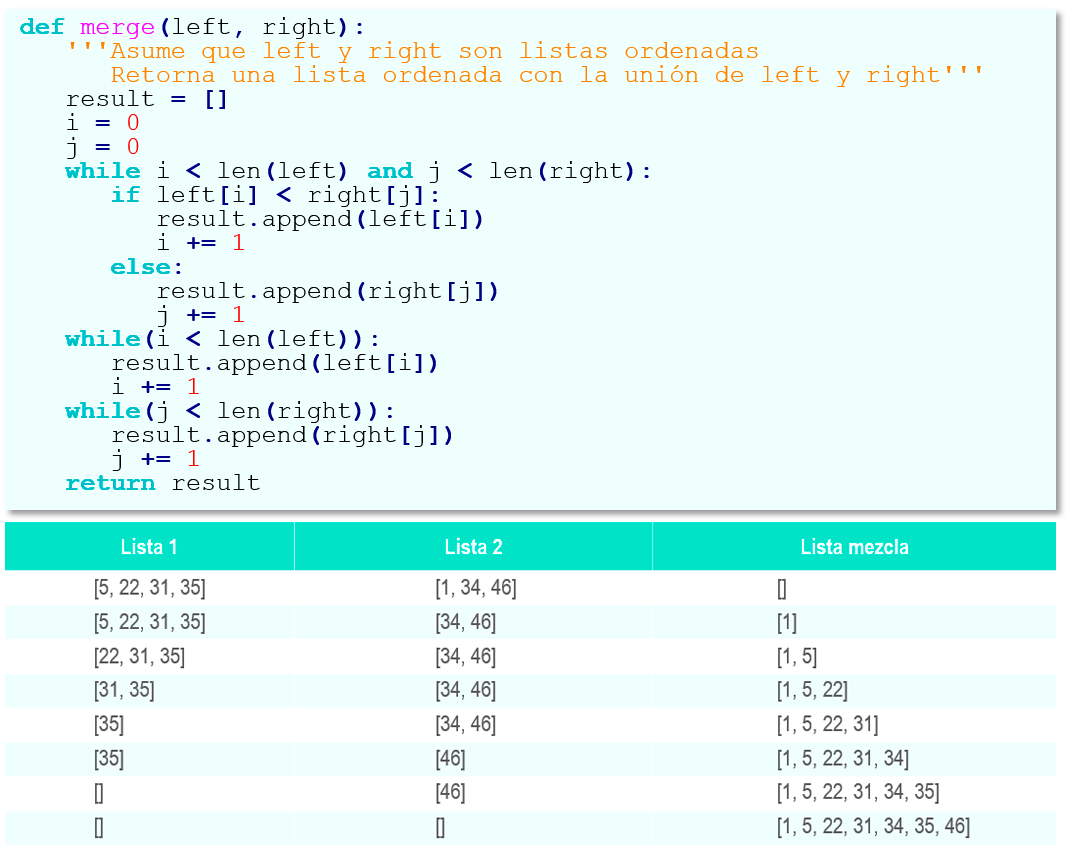

                                Fig. 6. Implementación del algoritmo de mezcla de listas ordenadas

Finalmente la Figura 7 muestra el algoritmo `mergesort` (ordenamiento por mezcla) en su implementación recursiva. En cada iteración recursiva, siempre que la lista tenga al menos dos elementos, ésta será partida en dos mitades hasta llegar a tener listas de un solo elemento. Cada pareja de listas se combina para generar una lista ordenada con la función merge. La repetición de este proceso de manera recursiva nos lleva al ordenamiento total de la lista inicial.

La recursión es una técnica de programación que permite a una función invocarse a si misma. Es una técnica avanzada que debe usarse cuidadosamente, por lo cual no forma parte de los objetivos de este curso. Se sugiere considerarla para la comprensión de la estrategia del mergeSort, pero no incorporarla a sus prácticas de programación habitual sin haber tenido el conocimiento suficiente de la misma.


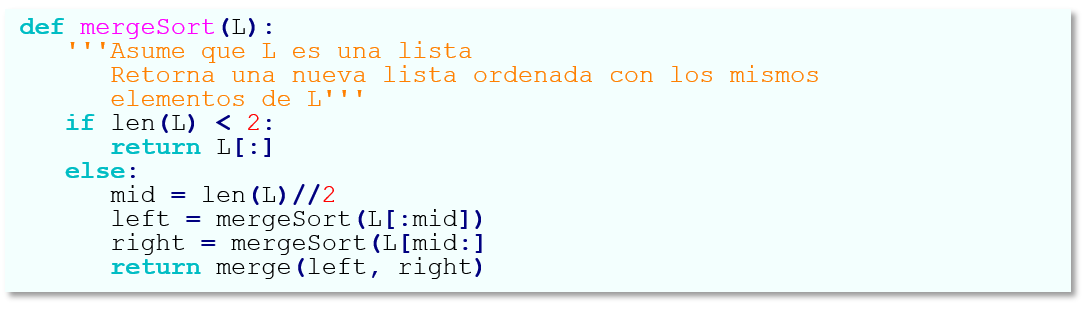

                                Fig. 7. Algoritmo `mergesort` en su implementación recursiva

En cada paso del mergeSort la lista se divide en dos, lo cual incrementa la eficiencia del algoritmo. Adicionalmente, debe considerarse que en cada invocación de la mezcla (*merge*) se hace un recorrido sobre todos los elementos de la lista pasada como argumento.


La Figura 8 muestra un ejemplo del proceso de ordenamiento por mezcla.


<img src="https://github.com/sisaza/informatica/blob/master/Unidad7/images/Inf1-u7-fig-19.png?raw=1" alt="Tree" width="400"/>


                                      Fig. 8. Ejemplo: proceso de ordenamiento por mezcla

#### Nota: las figuras y fragmentos de código presentados en esta Unidad que no remiten a una fuente, son de autoría del profesor Sebastián Isaza Ramírez.